In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline 

from src.model import RandomWalk
from src.train import generate_training_sets

Populating the interactive namespace from numpy and matplotlib


## Figure 3

We will recreate the diagram shown in Figure 3.

In [2]:
num_train_sets = 100
num_sequences   = 10 # or episodes
training_sets = generate_training_sets(num_sequences=num_sequences, num_train_sets=num_train_sets)

In [3]:
%time
dtype = np.float
alphas  = np.array([0.005, 0.01, 0.015], dtype=dtype)
lambdas = np.array([0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0], dtype=dtype) # given in figure 3 caption

rw = RandomWalk(alphas, lambdas)

results = rw.train_repeated(training_sets)


CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 11.9 µs


In [4]:
data = pd.DataFrame(results)

data.columns = ["lambda", "alpha", "rms", "rmsstd"]

data = data[data.groupby(['lambda'])['rms'].transform(min) == \
            data['rms']].set_index(keys=['lambda'])

data = data.drop('alpha', 1)
data = data.drop('rmsstd', 1)
data.head()

,rms
lambda,
0.0,0.105397
0.1,0.105140
0.3,0.105506
0.5,0.107528
0.7,0.113259


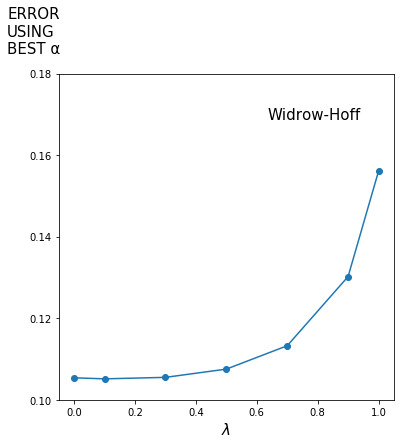

In [5]:
plt.figure(num=None, figsize=(6, 6), dpi=72)
plt.xlabel(r"$\lambda$", size=15)
plt.text(.79, .17, "Widrow-Hoff", ha="center", va="center", rotation=0,size=15)
plt.text(-.22, .185, "ERROR\nUSING\nBEST α",size=15)
plt.plot(data,marker='o')
plt.xticks([i * .1 for i in range(0, 11) if i % 2 == 0])
plt.yticks([(i * .01) for i in range(10, 20) if i % 2 == 0])
plt.savefig('plots/random_walk_fig3.png',dpi=72);

## Figure 4

In [6]:
num_train_sets = 100
num_sequences   = 10 # or episodes
training_sets = generate_training_sets(num_sequences=num_sequences, num_train_sets=num_train_sets)

In [7]:
alphas = np.linspace(0,0.7,8)
lambdas = np.array([1, 0, 0.8, 0.3], dtype=dtype) # given in figure 4 caption
RMSEs = dict(zip(lambdas, [[] for i in range(len(lambdas))]))
print(RMSEs)

{1.0: [], 0.0: [], 0.8: [], 0.3: []}


In [8]:
%time
model = RandomWalk(alphas, lambdas)

results = model.train_single(training_sets)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 42.9 µs


In [9]:
data = pd.DataFrame(results)

data.columns = ["lambda", "alpha", "rms", "rmsstd"]

RMSEs = data.groupby('lambda')['rms'].apply(list).to_dict()
# Truncate for pyplot
for k,v in RMSEs.items():
    v[:] = v[:6]
    
print(RMSEs)

{0.0: [0.23570226039551584, 0.12971945449716002, 0.08604616866069804, 0.10916744443436757, 0.2669520306954715, 1.5295178842101873], 0.3: [0.23570226039551584, 0.11809821552553618, 0.08327799961385614, 0.10426316478902596, 0.15930843326511812, 0.29471884735171083], 0.8: [0.23570226039551584, 0.11635871616140375, 0.13563480700637384, 0.18759679833109097, 0.2589059910549501, 0.38895549031248033], 1.0: [0.23570226039551584, 0.19971765975467537, 0.3029745241037205, 0.4550879758911128, 0.7318127678335854, 1.406859110951981]}


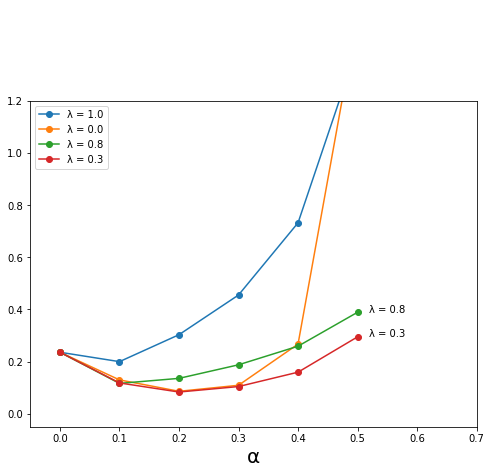

In [10]:
plt.figure(figsize=(8,6))
for i in lambdas:
    plt.plot(alphas[:6],RMSEs[i],'-o',label='λ = {}'.format(i))
    if i == 1:
        plt.annotate('λ = {} (Widrow-Hoff)'.format(i),(0.36,RMSEs[i][-1]+0.03))
    else:    
        plt.annotate('λ = {}'.format(i),(0.52,RMSEs[i][-1]))
plt.xlim([-0.05,0.7])
plt.ylim([-0.05,1.2])
plt.xlabel('α',size=20)
plt.legend(loc=2)

plt.savefig('plots/random_walk_fig4.png',dpi=72);

## Figure 5

In [11]:
%time 
#alphas  = [0.05 * i for i in range(0,21)]
lambdas = [0.05 * i for i in range(0, 21)]

results = []

rw = RandomWalk(alphas, lambdas)

results = rw.train_single(training_sets)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11 µs


In [19]:
data = pd.DataFrame(results)
print(len(data))

data.columns = ["lambda", "alpha", "rms", "rmsstd"]

data = data[data.groupby(['lambda'])['rms'].transform(min) == \
            data['rms']].set_index(keys=['lambda'])

# data = data.drop('alpha', 1)
# data = data.drop('rmsstd', 1)
data

441


,alpha,rms,rmsstd
lambda,,,
0.00,0.20,0.086046,0.023893
0.05,0.20,0.084833,0.024768
0.10,0.20,0.083902,0.025856
0.15,0.20,0.083257,0.027123
0.20,0.20,0.082914,0.028548
0.25,0.20,0.082907,0.030120
0.30,0.20,0.083278,0.031830
0.35,0.20,0.084087,0.033673
0.40,0.20,0.085407,0.035647


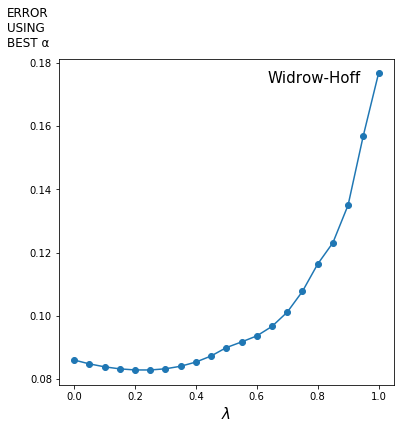

In [17]:
plt.figure(num=None, figsize=(6, 6), dpi=72)
plt.plot(data, marker='o') 
# plt.ylabel("RMS")
plt.text(.79, .175, "Widrow-Hoff", ha="center", va="center", rotation=0,size=15)
plt.text(-.22,.185, "ERROR\nUSING\nBEST α",size=12)
plt.xlabel(r"$\lambda$", size=15)
plt.savefig('plots/random_walk_fig5.png',dpi=72)